In [31]:
%load_ext autoreload
%autoreload 2

import toolkit
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
hfi = toolkit.preprocess_returns('data/edhec-hedgefundindices.csv')
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


# Semi Devitiation

In [7]:
hfi[hfi<0].std()

Convertible Arbitrage     0.019687
CTA Global                0.012495
Distressed Securities     0.015288
Emerging Markets          0.028197
Equity Market Neutral     0.009667
Event Driven              0.015536
Fixed Income Arbitrage    0.017940
Global Macro              0.006612
Long/Short Equity         0.014133
Merger Arbitrage          0.008954
Relative Value            0.012355
Short Selling             0.027377
Funds Of Funds            0.012191
dtype: float64

# Historic VaR

In [14]:
toolkit.historic_VaR(hfi, 5)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

# Gaussian VaR

In [20]:
toolkit.gaussian_VaR(hfi, 5)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

<AxesSubplot:title={'center':'VaR hedge fund strategies'}>

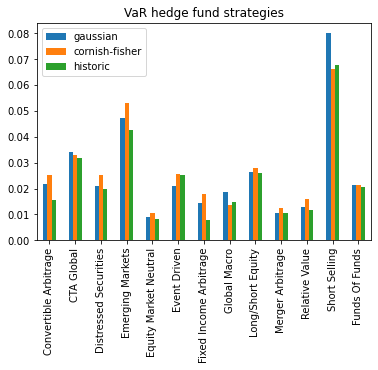

In [32]:
lst = [toolkit.gaussian_VaR(hfi, 5), toolkit.gaussian_VaR(hfi, 5, cornish=True), toolkit.historic_VaR(hfi, 5)]
df = pd.concat(lst, axis=1)
df.columns = ['gaussian', 'cornish-fisher', 'historic']
df.plot.bar(title='VaR hedge fund strategies')

# cVaR

In [34]:
toolkit.historic_cVaR(hfi, 5)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64